## 1. Introduction
In a certain medieval universe, there are n Kings and t trading houses. Each trading house discloses their trades on a daily basis to advertise their influence/power, while Kings have an agreement with the Emperor only disclose weekly. The Emperor, however would like to know about potential activities of his Kings in a timely manner, without raising any unnecessary question from his kings. Hence he hires you to figure out if you can back out the Kings activities through the trading houses.

# 2. Simplified Version
To start this problem let us assume that we have only 2 kings and 2 trading houses.
We assume that we can model activity by the equation

\begin{align}
 K_{i}(t) =  \sum_j \pi_{ij} T_j(t) + \epsilon(t) \,,\text{where } \vec{\pi}_i  \sim \text{Dir}(\vec{\pi}_i | \vec{\alpha})
\end{align}
that is $\vec{\pi}_{i}$ is a latent variable, following a dirichlet distribution, while K_i follows a normal distribution
\begin{equation}
K_{i} \sim \text{N}(K_i | \vec{T}^\top \vec{\pi})
\end{equation}

Note that there is an important subtility in the difference between the random variable $K(t)$ and $\pi$: $K(t)$ and hence $\epsilon_t$ are actually $n$ random variables which are sampled from the same distribution, while $\pi$ is sampled only once in the beginning and is assumed to be constant throughout the process.

In [1]:
import numpy as np
#import pymc
import matplotlib
import mymodel

%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('paper')
sns.set_style('darkgrid')

%load_ext autoreload
%autoreload 2

Lets first start with simulating some training data

In [2]:
import numpy as np
#from pymc3 import DiscreteUniform, Exponential, deterministic, Poisson, Uniform
import pymc3 as pm
import theano.tensor as tt

# Load And Show Old Faithful data
We want to apply a full bayesian gaussian mixture model to this classical example. We want to estimate all parameters, especially how many states $k$ are optimal

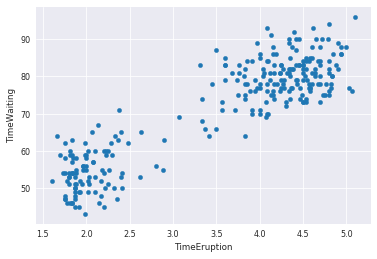

In [3]:
dataUrl='https://www.biz.uiowa.edu/faculty/jledolter/datamining/OldFaithful.csv'
data = pd.read_csv(dataUrl)
data.plot(kind='scatter', x='TimeEruption', y='TimeWaiting')

Optical examination of the data shows that there are 2 modes. A first guess would be that the optimal numbers of states is $k \geq 2 $

In [ ]:
df.plot(kind='scatter', x='col1', y='col2', s=df.col3)

# Run the example from the pymc3 examples

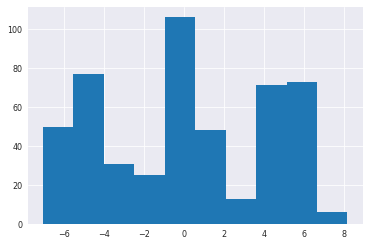

In [4]:
np.random.seed(12345) # set random seed for reproducibility

k = 3
ndata = 500
spread = 5
centers = np.array([-spread, 0, spread])

# simulate data from mixture distribution
v = np.random.randint(0, k, ndata)
data = centers[v] + np.random.randn(ndata)

plt.hist(data);

In [6]:
import inspect
inspect.getsourcelines(pm.Potential)

(['def Potential(name, var, model=None):\n',
  '    """Add an arbitrary factor potential to the model likelihood\n',
  '\n',
  '    Parameters\n',
  '    ----------\n',
  '    name : str\n',
  '    var : theano variables\n',
  '\n',
  '    Returns\n',
  '    -------\n',
  '    var : var, with name attribute\n',
  '    """\n',
  '    model = modelcontext(model)\n',
  '    var.name = model.name_for(name)\n',
  '    model.potentials.append(var)\n',
  '    model.add_random_variable(var)\n',
  '    return var\n'],
 1337)

In [16]:
tkl = [5, 3, 4, 6, 7]
sum([y - x for (x,y) in zip (tkl[:-1], tkl[1:])])

2

In [20]:
print(tkl[:-1])
print(tkl[1:])
zip(tkl[:-1], tkl[1:])

[5, 3, 4, 6]
[3, 4, 6, 7]


[(5, 3), (3, 4), (4, 6), (6, 7)]

In [12]:
# Define a function that transforms a list of n numbers to 
sum([tt.switch(y - x) for (x, y) in zip(means[:-1], means[1:])])


Elemwise{add,no_inplace}.0

In [ ]:
[(x + y) / 2.0 for (x, y) in zip(my_list[:-1], my_list[1:])]

In [19]:
# setup model
model = pm.Model()
with model:
    # cluster sizes
    p = pm.Dirichlet('p', a=np.ones(k), shape=k)
    # ensure all clusters have some points
    p_min_potential = pm.Potential('p_min_potential', tt.switch(tt.min(p) < .1, -np.inf, 0))


    # cluster centers
    means = pm.Normal('means', mu=[0, 0, 0], sd=15, shape=k) # This needs to be 2-dim
    # break symmetry
    #order_means_potential = pm.Potential('order_means_potential',
    #                                     tt.switch(means[1]-means[0] < 0, -np.inf, 0)
    #                                     + tt.switch(means[2]-means[1] < 0, -np.inf, 0))
    order_means_potential = pm.Potential('order_means_potential',
                                         np.sum([tt.switch(y - x < 0, -np.inf, 0) for (x, y) in 
                                              zip(means[:-1], means[1:])]))
                                         
    # measurement error
    sd = pm.Uniform('sd', lower=0, upper=20)

    # latent cluster of each observation
    category = pm.Categorical('category',
                              p=p,
                              shape=ndata)

    # likelihood for each observed value
    points = pm.Normal('obs',
                       mu=means[category],
                       sd=sd,
                       observed=data)

ValueError: length not known: Subtensor{:int64:} [id A] ''   
 |means [id B]
 |Constant{-1} [id C]


Lets get answers to the uestions:
1. Is $p \geq 0.1$ true? -> Yes. This can be seen in the first subplot, as all the distributions are well above 0.1
2. Is mean[2] > mean[1] > mean[0] correct? -> Yes. Please check tr.get_values('means')[:300]

In [8]:
# fit model
with model:
    step1 = pm.Metropolis(vars=[p, sd, means])
    step2 = pm.ElemwiseCategorical(vars=[category], values=[0, 1, 2])
    tr = pm.sample(10000, step=[step1, step2])

/home/paulmartinposch/assignment1/.env/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
100%|██████████| 10500/10500 [00:48<00:00, 217.89it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ee73e4290>]], dtype=object)

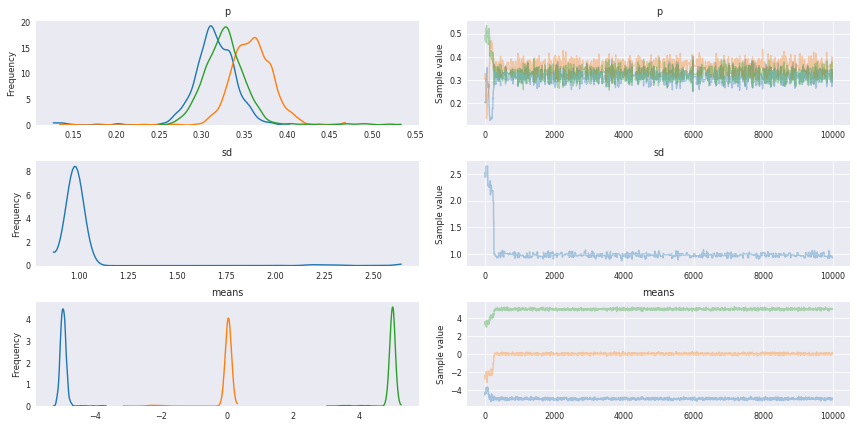

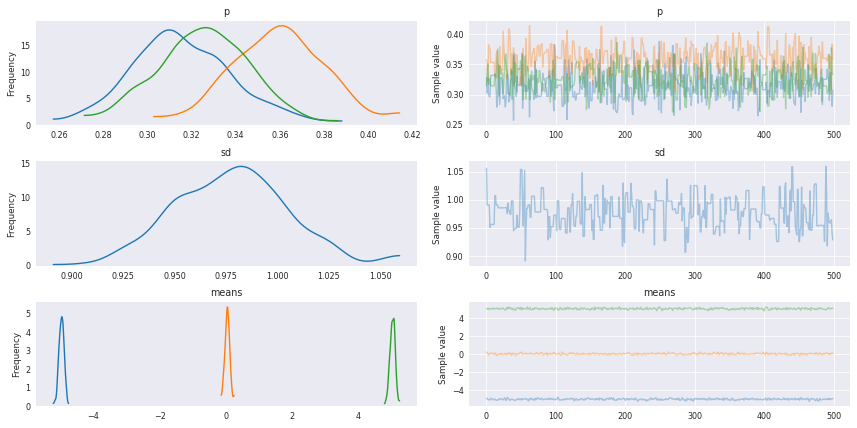

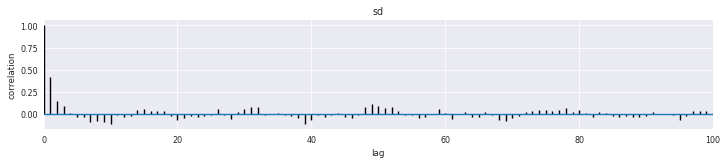

In [9]:
pm.plots.traceplot(tr, ['p', 'sd', 'means'])
pm.plots.traceplot(tr[5000::10], ['p', 'sd', 'means']);
pm.autocorrplot(tr[5000::10], varnames=['sd'])

In [23]:
print(dir(trace))
print(trace.varnames)
values = trace.get_values(trace.varnames[0])
values.tolist()


['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattr__', '__getattribute__', '__getitem__', '__hash__', '__init__', '__len__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_attrs', '_slice', '_straces', 'add_values', 'chains', 'get_sampler_stats', 'get_values', 'nchains', 'point', 'points', 'stat_names', 'varnames']
['mu1']


[[-0.8716893166071271,
  -0.4621939665389959,
  -0.12394700718056278,
  0.21267248042906062,
  -0.47769780888567204,
  -1.3106392376085694,
  -0.48492994029033953,
  0.4774603458309812,
  0.6857377884174385,
  0.7806631975336193],
 [1.0006875318377246,
  0.9323581738287361,
  -0.8124370254796196,
  -1.4003179715280343,
  0.502009809656636,
  1.0735568563791855,
  0.24158634059068018,
  0.4862394105074077,
  -0.3473233362461149,
  -0.5660178694138237],
 [-0.07443651928788764,
  -2.462352067457748,
  1.4052266901816295,
  0.2228019915746845,
  -1.6899065744998656,
  -0.6276228024873023,
  0.1293371867214361,
  0.45211054595229905,
  0.4843730345821212,
  2.0299955383336687],
 [0.04260350839653196,
  1.2875680705599655,
  -0.26789543328935794,
  -0.03049096040688465,
  2.2359769304327943,
  1.0653651340049466,
  0.37380629599138193,
  0.26195675766120163,
  -0.3901631358111677,
  -2.0395544010522637],
 [0.9768651170952035,
  -0.9672756800824569,
  0.09173473484363037,
  0.4895655942969209

In [22]:
pymc.Normal('k',mu=0,tau=.01)

array([[ 50,  20,  30,  40, 100, 200],
       [ 10,   5,  60,  10,  30,  40]])